In [86]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [2]:
train.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [3]:
#Podemos ver la memoria total utilizada en MB. Para ver cuanta memoria consume cada columna, hacer train.memory_usage()
(train.memory_usage() / (1024 * 1024)).sum()

42.11433410644531

In [4]:
dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'category', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'float64', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.

train_optimized = pd.read_csv('data/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)
train_optimized.dtypes

id                               int32
titulo                          object
descripcion                     object
tipodepropiedad               category
direccion                       object
ciudad                        category
provincia                     category
antiguedad                     float16
habitaciones                   float16
garages                        float16
banos                          float16
metroscubiertos                float16
metrostotales                  float16
idzona                         float64
lat                            float64
lng                            float64
fecha                           object
gimnasio                       float16
usosmultiples                  float16
piscina                        float16
escuelascercanas               float16
centroscomercialescercanos     float16
precio                         float32
dtype: object

In [5]:
#Se puede observar que el memory usage bajó más de la mitad
(train_optimized.memory_usage() / (1024 * 1024)).sum()

20.647438049316406

In [6]:
train_optimized['Precio_ARS'] = train_optimized.precio.map(lambda monto: monto*2.78)
train_optimized.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Precio_ARS
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,6318940.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,10008000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,3336000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,1807000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,3197000.0


In [66]:
train_prov = train_optimized[['provincia']]
train_tipoprop = train_optimized[['tipodepropiedad']]
tabla1 = train_tipoprop['tipodepropiedad'].value_counts()

In [68]:
tipos_vendidos=pd.concat([tabla1],axis=1)
tipos_vendidos.columns = ['Tipos de propiedad']

Text(0,0.5,'Cantidad')

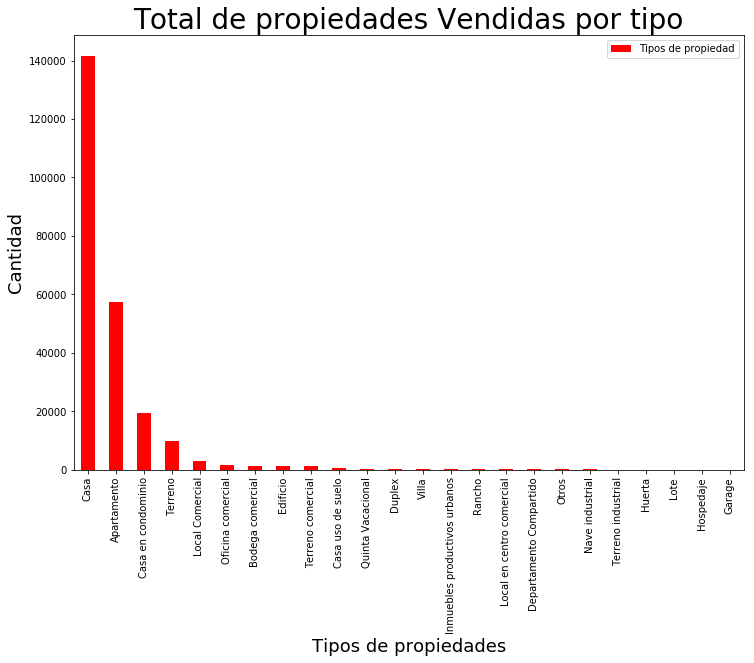

In [73]:
# Mas del 50% del total de propiedades vendidas son Casas (58.33% aprox)

g = tipos_vendidos.plot.bar(color=["Red"],figsize=(12,8))
g.set_title("Total de propiedades Vendidas por tipo", fontsize=28)
g.set_xlabel("Tipos de propiedades",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)

## Hago columnas nuevas con año, mes, día

In [76]:
train_optimized['año'],train_optimized['mes'],train_optimized['dia']= train_optimized['fecha'].str.split(' ').str[0].str.split('-').str
train_optimized

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Precio_ARS,año,mes,dia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2273000.0,6318940.00,2015,08,23
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0.0,0.0,0.0,1.0,1.0,3600000.0,10008000.00,2013,06,28
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1200000.0,3336000.00,2015,10,17
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,650000.0,1807000.00,2012,03,09
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,3197000.00,2016,06,07
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1100000.0,3058000.00,2014,03,18
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,3197000.00,2016,02,23
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4200000.0,11676000.00,2016,10,20
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,310000.0,861800.00,2014,01,06
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,6200000.0,17236000.00,2016,12,22


In [136]:
t1 = train_optimized
for_heatmap = t1.pivot_table(index='mes', columns='dia', values='tipodepropiedad', aggfunc='sum')

Text(52.7222,0.5,'Mes')

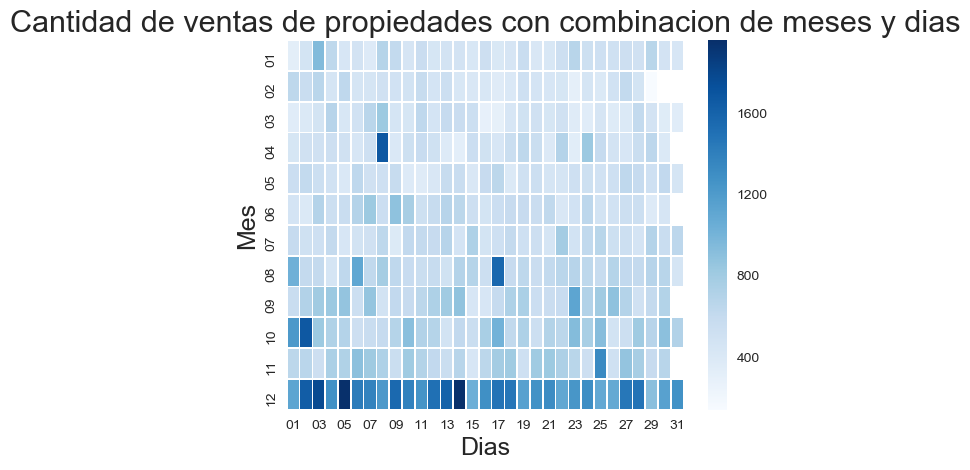

In [138]:
# Cantidad de ventas de propiedades por dias de cada mes
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de ventas de propiedades con combinacion de meses y dias", fontsize=22)
g.set_xlabel("Dias",fontsize=18)
g.set_ylabel("Mes", fontsize=18)